# **Wikipedia Movie Plots**
## Εργασία εξαμήνου για το μάθημα *ΒΑΘΙΑ ΜΑΘΗΣΗ*
Εκπονήθηκε από την Όλγα Βασιλείου, Α.Μ.: 01691, 5ο έτος
***

## Πίνακας Περιεχομένων

- [Εισαγωγή](#Εισαγωγή)
- [Βιβλιογραφική ανασκόπηση](#Βιβλιογραφική-ανασκόπηση)
- [Υλοποίηση](#Υλοποίηση)
    - [Πείραμα 1: Ανθρώπινες Αποφάσεις](#Πείραμα-1:-Ανθρώπινες-Αποφάσεις)
        - [1.1 Φόρτωση Δεδομένων](#1.1-Φόρτωση-Δεδομένων)
        - [1.2 Προεπεξεργασία Δεδομένων](#1.2-Προεπεξεργασία-Δεδομένων)
        - [1.3 Εξαγωγή Χαρακτηριστικών](#1.3-Εξαγωγή-Χαρακτηριστικών)
        - [1.4 Κατασκευή, Εκπαίδευση και Αξιολόγηση του Μοντέλου Πρόβλεψης](#1.4-Κατασκευή,-Εκπαίδευση-και-Αξιολόγηση-του-Μοντέλου-Πρόβλεψης)
    - [Πείραμα 2: Αλγοριθμικές Αποφάσεις](#Πείραμα-2:-Αλγοριθμικές-Αποφάσεις)
        - [2.1 Φόρτωση Δεδομένων](#2.1-Φόρτωση-Δεδομένων)
        - [2.2 Προεπεξεργασία Δεδομένων](#2.2-Προεπεξεργασία-Δεδομένων)
        - [2.3 Εξαγωγή Χαρακτηριστικών](#2.3-Εξαγωγή-Χαρακτηριστικών)
        - [2.4 Κατασκευή, Εκπαίδευση και Αξιολόγηση του Μοντέλου Πρόβλεψης](#2.4-Κατασκευή,-Εκπαίδευση-και-Αξιολόγηση-του-Μοντέλου-Πρόβλεψης)
- [Συμπεράσματα](#Συμπεράσματα)
- [Αναφορές](#Αναφορές)

## Εισαγωγή

Ένα ενδιαφέρον πρόβλημα στον τομέα της μηχανικής μάθησης είναι η διαχείριση της φυσικής γλώσσας. Μέχρι σήμερα υπάρχουν αρκετές έρευνες πάνω στην επεξεργασία φυσικής γλώσσας (Natural Language Processing - NLP), με εφαρμογές όπως η αναγνώριση θετικών και αρνητικών κριτικών, η αναγνώριση κειμένου παραγώμενο από ΑΙ κ.ά. Ένα ακόμα ενδιαφέρον πρόβλημα είναι η ταξινόμηση ειδών ταινίας με βάση την πλοκή, το οποίο έχει μελετηθεί κυρίως σε επίπεδο παραδοσιακών αλγορίθμων μηχανικής μάθησης.

Σκοπός της παρούσας εργασίας είναι να διερευνηθεί η ικανότητα ενός νευρωνικού δικτύου να εκπαιδευτεί στην πρόβλεψη του είδους μιας ταινίας με βάση την περιγραφή της πλοκής της ταινίας. Η υλοποίηση αφορά το σύνολο δεδομένων [Wikipedia Movie Plots](https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots), το οποίο περιέχει γνωρίσματα από 34,886 ταινίες παγκοσμίως. Οι στήλες του dataset αποτελούν και τα γνωρίσματα της κάθε ταινίας, τα οποία είναι:
- Έτος Κυκλοφορίας (Release Year)
- Τίτλος (Title)
- Προέλευση/Εθνικότητα (Origin/Ethnicity)
- Σκηνοθέτης (Director)
- Ηθοποιοί (Cast)
- Είδος (Genre)
- Σελίδα στη Βικιπαίδεια (Wiki Page)
- Πλοκή (Plot)

Ένας αρχικός περιορισμός αποτελεί το γεγονός πως υπάρχουν διπλότυπες εγγραφές και ταινίες που ανήκουν σε άγνωστη κατηγορία. Παράλληλα, οι γνωστές κατηγορίες είναι γραμμένες με διαφορετικούς τρόπους ή μία ταινία ανήκει σε πολλές κατηγορίες. Είναι προφανές, λοιπόν, πως πρέπει να ληφθούν αποφάσεις για την διαχείρηση των κατηγοριών που θα χρησιμοποιηθούν στην εκπαίδευση. Βιβλιογραφικά, είτε επιλέγονται λίγες κλάσεις είτε γίνεται μία μικρή ομαδοποίηση manually με βάση το ατομικό κριτήριο. Για παράδειγμα, ταινίες με είδος "science fiction", "science-fiction", "sci fi" και "sci-fi" λάμβανουν όλες την ίδια ονομασία. Ταυτόχρονα, λαμβάνονται αποφάσεις για ταινίες που ανήκουν σε πολλαπλές κατηγορίες, όπως για παράδειγμα μία ρομαντική κομεντί θα μπει στην κατηγορία "romance". Ωστόσο, μία λάθος απόφαση μπορεί να στοιχίσει στην εκπαίδευση, ενώ είναι και μία διαδικάσια εξαιρετικά χρονοβόρα. Ένας εναλλακτικός και δημιουργικός τρόπος είναι η ομαδοποίηση με τη χρήση αλγορίθμου (k-means). Στην παρούσα εργασία διερευνούνται δύο μέθοδοι:
1. Ανθρώπινες αποφάσεις
2. Αλγοριθμηκές αποφάσεις

## Βιβλιογραφική ανασκόπηση

Η μελέτη σχετικών προσεγγίσεων επικεντρώθηκε σε αρχιτεκτονικές Αναδρομικών Νευρωνικών Δικτύων (Recurrent Neural Networks - RNN), καθώς η δυνατότητά τους να καταγράφουν ακολουθιακά δεδομένα κατά την ταξινόμηση κειμένων φυσικής γλώσσας τα καθιστά πιο κατάλληλα από τα Συνελικτικά Νευρωνικά Δίκτυα (Convolutional Neural Networks - CNN) για την επεξεργασία των πλοκών του dataset. Παρακάτω παρουσιάζονται οι 5 πιο σχετικές εργασίες που μελετήθηκαν:

| Source | Dataset | Classification Type | Word Embedding | Architecture |
| :- | :- | :- | :- | :- |
| [Movie Genre Classification from Plot Summaries using Bidirectional LSTM](https://ieeexplore.ieee.org/document/8334466) | MovieLens, OMDb API | Single-label | - | Bidirectional LSTM |
| [Using Machine Learning to Identify Movie Genres through Online Movie Synopses](https://doi.org/10.1109/itca52113.2020.00008) | TMDB 5000 Movie Dataset, ROTTEN TOMATOES website | Single-label | Doc2Vec | k-NN, SVM, CNN, RNN, RNN-LSTM |
| [Master Movie Genre Prediction with NLP](https://datadrivenscience.com/master-movie-genre-prediction-with-nlp-a-comprehensive-guide-to-imdb-dataset-analysis-and-lstm-modeling/) | IMDb Non-Commercial Datasets | Multi-label | GLoVe | LSTM |
| * [Multilabel-category-prediction](https://www.kaggle.com/code/rodsaldanha/multilabel-category-prediction/notebook) (Kaggle) | Netflix Movies and TV Shows | Multi-label | Keras in-built, GloVe | CNN, LSTM |
| [Movie_Genre_Prediction](https://github.com/fdonel99/Movie-Genre-Prediction/blob/main/Movie_Genre_Prediction_.ipynb) (GitHub) | Wikipedia Movie Plots | Single-label | Bigrams, Trigrams, GloVe | Bidirectional LSTM |
| [movie-genre-prediction](https://github.com/avijit2verma/movie-genre-prediction/tree/master) (GitHub) | Custom dataset based on IMDb | Multi-label | GloVe | LSTM |

Η πλειονότητα των εργασιών αξιοποιούν τη μέθοδο διανυσματικών παραστάσεων λέξεων **GloVe**,  ένα προεκπαιδευμένο εργαλείο που αφορά σύνολα δεδομένων μεγάλου όγκου και μοντέλα που απαιτούν προσοχή στις ακολουθίες (σειρές) λέξεων και τις σχέσεις μεταξύ αυτών. Εξίσου έντονη είναι η χρήση του **Long Short-Term Memory (LSTM)** δικτύου. Τα LSTM δίκτυα είναι ένα είδος RNN ειδικά σχεδιασμένο να χειρίζεται σειριακά δεδομένα, όπως χρονοσειρές, ομιλία και κείμενο, λόγω της ικανότητάς του να μαθαίνει μακροπρόθεσμες εξαρτήσεις μεταξύ των δεδομένων. Πέρα από το παραδοσιακό LSTM, χρησιμοποιείται και το αμφίδρομο δίκτυο (Bidirectional LSTM ή BiLSTM), το οποίο λαμβάνει υπόψιν τόσο τα δεδομένα που προηγούνται της λέξης που εξετάζεται, όσο και τα δεδομένα που την διαδέχονται, αυξάνοντας την ακρίβεια της εκπαίδευσης του μοντέλου. Ωστόσο, το BiLSTM δίκτυο απαιτεί περισσότερους υπολογιστικούς πόρους, οπότε δεν προτιμάται στην προκειμένη περίπτωση.

Δεδομένου ότι οι περισσότερες ταινίες, ανεξαρτήτου συνόλου δεδομένων, ανήκουν σε παραπάνω από ένα είδος (κατηγορία), οι περισσότερες προσεγγίσεις αντιμετωπίζουν το πρόβλημα ως ταξινόμηση πολλαπλών ετικετών (multi-label classification), ενώ άλλες επιλέγουν να κρατήσουν είτε τα πιο συχνά είδη είτε την απλοποίηση και ομαδοποίηση των κατηγοριών ταινιών, ώστε η κάθε ταινία να ανήκει σε ένα μόνο είδος. Για μείωση της πολυπλοκότητας του μοντέλου, η παρούσα εργασία εφαρμόζει single-label classification.

\* Εδώ εξετάστηκαν επίσης μέθοδοι μηχανικής μάθησης με ταξινομητές όπως Logistic Regression, Multinomial Naive Bayes, Gaussian Naive Bayes, Linear SVC, κ.ά.

## Υλοποίηση

Ακολουθούν οι δύο μέθοδοι που εξετάστηκαν στα πλαίσια της εργασίας. Ο κώδικας ακολουθεί την ίδια ροή και στα δύο πειράματα, με τη μόνη διαφορά ότι στο πρώτο πείραμα η απλοποίηση και ομαδοποίηση των κατηγοριών ταινιών γίνεται χειροκίνητα και με βάση σχετική έρευνα στο διαδίκτυο, ενώ στο δεύτερο πείραμα η ομαδοποίηση επιτυχάνεται μέσω του αλγορίθμου K-Means.

### Πείραμα 1: Ανθρώπινες Αποφάσεις

#### 1.1 Φόρτωση Δεδομένων
Αρχικά, εισάγονται τις απαραίτητες βιβλιοθήκες για την μεταγλώτισση και εκτέλεση του κώδικα.

In [47]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

import nltk, re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, MaxPooling1D, Dropout, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Κατόπιν, φορτώνεται το αρχείο της εκφώνησης, δηλαδή το dataset με τις πλοκές ταινιών από την Βικιπαίδεια, το οποίο είναι κατεβασμένο τοπικά, και εμφανίζονται οι πρώτες δέκα εγγραφές του αρχείου για την εξοικείωση με τη μορφή του dataset.

In [2]:
# Read dataset
movies_df = pd.read_csv('wiki_movie_plots_deduped.csv')

# Show dataset shape
print("Dataset movies:",movies_df.shape[0],"\n")

# Show first 5 rows of data
movies_df.head(5)

Dataset movies: 34886 



,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


#### 1.2 Προεπεξεργασία Δεδομένων

Όπως φανερώνει ο στόχος της εργασίας, τα δεδομένα που χρειάζονται για την ανάπτυξη ενός μοντέλου πρόβλεψης του είδους μιας ταινίας με βάση την περιγραφή της πλοκής της ταινίας, είναι αυτά στις στήλες "Genre" και "Plot". Επομένως, απομακρύνονται οι υπόλοιπες στήλες του dataset, εκτός από τη στήλη "Title", η οποία θα αξιοποιηθεί παρακάτω.

In [3]:
# Remove unnecessary columns
movies_df.drop(columns = ['Release Year', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis = 1, inplace = True)

##### Στήλη 'Genre'
Πρώτο βήμα είναι η μετατροπή των άγνωστων τιμών του πεδίου "Genre" (είδος) σε NULL τιμές και η αφαίρεσή τους από το αρχείο. Κατόπιν ελέγχεται το σύνολο των ταινιών. Συγκεκριμένα, μία ταινία της οποίας ο τίτλος και η πλοκή επαναλαμβάνονται, αποτελεί διπλότυπη εγγραφή και διαγράφεται.

In [4]:
# Replace "unknown" genre entries with NaN
movies_df['Genre'] = movies_df['Genre'].replace('unknown',np.nan)

# Remove NaN values
movies_df = movies_df.dropna(axis = 0, subset = ['Genre'])

# Remove duplicates based on the 'Title' and 'Plot' columns
movies_df.drop_duplicates(subset = ['Title','Plot'], keep = 'first', inplace = True)

# Show updated number of movies
print("Unique movies:", movies_df.shape[0])

Unique movies: 28560


Στη συνέχεια, ελέγχονται οι μοναδικές τιμές της στήλης "Genre" για να μάθουμε πόσες κατηγορίες ταινιών περιέχει το σύνολο δεδομένων της εργασίας.

In [5]:
# Find unique values in 'Genre'
unique_genres = movies_df['Genre'].unique()

# Display number of unique genres
print("Dataset genres:", len(unique_genres))

Dataset genres: 2241


Σε αυτό το σημείο ολοκληρώνεται η κοινή προεπεξεργασία των δεδομένων για τα δύο πειράματα και συνεχίζει ο manual διαχωρισμός των ειδών ταινίας. Επομένως, γίνεται αντιγραφή του αρχείου, δημιουργώντας το dataset του πειράματος 1.

In [6]:
# Create copy of dataset for first model
data1 = movies_df.copy()

Συνεχίζοντας, από την εκτύπωση του συνόλου τιμών της ανανεωμένης στήλης "Genre" φαίνεται πως οι μοναδικές τιμές είναι 2241, παρόλο που οι τιμές αυτές δεν αντιστοιχούν σε 2241 πραγματικά μοναδικά είδη ταινιών. Μελετώντας το dataset, ανακαλύπτουμε πως υπάρχουν πολλά είδη που αποτελούν συνδυασμό άλλων ή παράγωγα πιο γνωστών ειδών, οπότε το επόμενο βήμα είναι ο διαχωρισμός των ειδών κάθε ταινίας, η αντικατάσταση μερικών από αυτά τα είδη, η απομάκρυνση των κενών ετικετών που προκύπτουν από τον διαχωρισμό και η εμφάνιση των 20 δημοφιλέστερων ειδών που προκύπτουν από τις αλλαγές που εφαρμόστηκαν.

In [7]:
# Split genre labels using regular expressions
data1['Genre'] = data1['Genre'].apply(lambda x: re.split(r'\s|,|-|/|\'|\(|\)|\[|\]', x))

# Flatten the genre labels
data1 = data1.explode('Genre')

# Remove leading/trailing whitespace
data1['Genre'] = data1['Genre'].str.strip()

# Replace genres containing or starting with a particular letter sequence
data1['Genre'] = data1['Genre'].str.replace('.*dram.*', 'drama', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^rom.*', 'romance', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^com.*', 'comedy', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^satir.*', 'comedy', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^sci.*', 'science fiction', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^psycho.*', 'thriller', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^doc.*', 'documentary', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^anim.*', 'animation', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^bio.*', 'biography', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^histo.*', 'history', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('.*ser.*', 'series', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^sex.*', 'adult', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^ero.*', 'adult', case=False, regex=True)
data1['Genre'] = data1['Genre'].str.replace('^ww.*', 'war', case=False, regex=True)

# Filter out empty or whitespace genre labels and sort genres
data1['Count'] = 1
genres = data1[data1['Genre'].str.strip()!='']
genres = genres[['Genre', 'Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False)

#Print updated number of unique genres
print("Unique genres:",len(genres),"\n")

# Show top 20 genres
genres.head(20)

Unique genres: 650 



,Genre,Count
176,drama,9448
139,comedy,7303
489,romance,2629
19,action,2429
595,thriller,1803
147,crime,1580
245,horror,1568
634,western,969
505,science fiction,957
368,musical,942


Από τον παραπάνω κώδικα, φαίνεται πως τα μοναδικά είδη ταινιών δεν είναι 2264 αλλά 650. Αυτός ο αριθμός όμως περιέχει πολλές εκδοχές ίδιων ή παρόμοιων ειδών, οπότε συνεχίζεται η προεπεξεργασία της στήλης "Genre", ώστε να περιοριστούν όσο το δυνατόν περισσότερο οι επαναλήψεις ειδών. Επίσης, επειδή ο διαχωρισμός των ειδών οδηγεί σε κατηγορίες που δεν αποτελούν είδη ταινίας (π.χ. `'martial arts'` χωρίζεται σε `'martial'` και `'arts'` με το δεύτερο να απλοποιείται σε 'action' και το δεύτερο να απομακρύνεται από τη λίστα ειδών), διαγράφονται τα κατάλοιπα των ειδών αυτών.

In [8]:
# Simplify movie genres
data1['Genre'].replace({"love":"romance",
                        "tokusatsu":"fantasy",
                        "folklore":"fantasy",
                        "kaiju":"fantasy",
                        "fairy":"fantasy",
                        "literary":"drama",
                        "epic":"history",
                        "period":"history",
                        "costume":"history",
                        "parody":"comedy",
                        "music":"musical",
                        "kids":"family",
                        "teen":"family",
                        "children":"family",
                        "cartoon":"animation",
                        "superheroes":"action",
                        "superhero":"action",
                        "western":"action",
                        "martial":"action",
                        "kung":"action",
                        "noir":"crime",
                        "mystery":"crime",
                        "espionage":"spy",
                        "zombie":"horror",
                        "slasher":"horror",
                        "footage":"horror",
                        "suspense":"thriller",
                        "supernatural":"thriller",
                        "television":"series",
                        "slapstick":"comedy",
                        "screwball":"comedy",
                        "mockumentary":"documentary"}, inplace=True)

# Remove remaining words of simplified genres
non_genres = ['fi','fu','film','arts','short','world','']
data1 = data1[~data1['Genre'].isin(non_genres)]

Για να ανήκει κάθε ταινία σε μία μόνο κατηγορία, διαγράφονται όσες διπλότυπες εγγραφές προέκυψαν κατά την προεπεξεργασία της στήλης "Genre". Παράλληλα, απομακρύνονται όσες κατηγορίες εμφανίζονται λιγότερο από 1000 φορές στο dataset, ώστε να είναι όσο το δυνατόν πιο ισορροπημένο το  σύνολο δεδομένω.

In [9]:
# Remove duplicate occurrences of the same movie
data1.drop_duplicates(subset=['Plot'], keep='first', inplace=True)

# Count the occurrences of each genre
genre_counts = data1['Genre'].value_counts()

# Remove genres that appear in less than 1000 movies
mask = genre_counts[data1['Genre']].values < 1000
data1 = data1[~mask]

# Filter out empty or whitespace genre labels
genres = data1[data1['Genre'].str.strip() != '']
genres = genres[['Genre', 'Count']].groupby(['Genre'], as_index = False).sum().sort_values(['Count'], ascending = False)

# Print the number of remaining genres
print("Final genres:",len(genres),"\n")

# Show all movie genres with more than 100 occurrences in descending order
genres

Final genres: 7 



,Genre,Count
3,drama,6914
1,comedy,5656
0,action,3077
5,romance,1951
2,crime,1948
4,horror,1379
6,thriller,1227


Ακολουθεί η οπτικοποίηση της ενημερωμένης στήλης ειδών ταινιών.

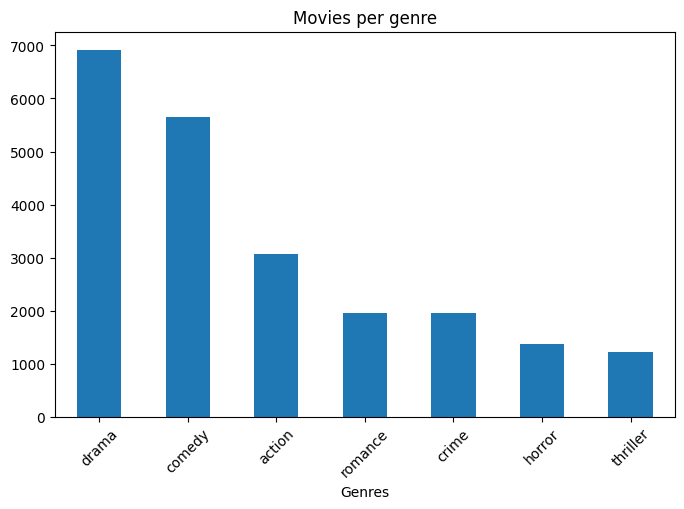

In [10]:
# Count the occurrences of each genre
genres_count = data1['Genre'].value_counts()

# Plot genres
plt.figure(figsize=(8,5))
genres_count.plot(kind='bar')
plt.xlabel('Genres')
plt.title('Movies per genre')
plt.xticks(rotation=45)
plt.show()

Παρά την απομάκρυνση κατηγοριών με λίγες εμφανίσεις, οι κατηγορίες 'drama' και 'comedy' ακόμα περιέχουν από 2 έως και 6 φορές περισσότερα δεδομένα από τις υπόλοιπες κατηγορίες, γεγονός που καθιστά το dataset μη ισορροπημένο. Αυτό μπορεί να επηρεάσει την εκπαίδευση του μοντέλου και τον υπολογισμό των μέτρων απόδοσής του. Επομένως, επιλέγεται η μέθοδος weighting, η οποία αναθέτει υψηλότερα βάρη στις λιγότερο συχνές κατηγορίες, με στόχο την αποφυγή υπερ-προσαρμογής (overfitting) του μοντέλου και τη βελτίωση της απόδοσής του.

In [11]:
# Compute class weights to handle imbalanced dataset
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=data1['Genre'].unique(), y=data1['Genre'])

# Convert the class weights to a dictionary
class_weight_dict = dict(enumerate(class_weights))

##### Στήλη 'Plot'

Για την καλύτερη κατανόηση των πλοκών από το μοντέλο ταξινόμησης, τα κείμενα της στήλης "Plot" περνούν από μία διαδικασία "καθαρισμού". Συγκεκριμένα, στο στάδιο αυτό αφαιρούνται από τις πλοκές των ταινιών τα σημεία στίξης, οι ειδικοί χαρακτήρες και τα αλφαριθμητικά που θεωρούνται θόρυβος στα κείμενα, και μετατρέπονται όλα τα κεφαλαία σε πεζά γράμματα. Ταυτόχρονα, οι λέξεις της κάθε πλοκής απομονώνονται ως σύμβολα (tokens) και μετατρέπονται στη βασική τους μορφή με τη διαδικασία της λημματοποίησης (lemmatization), ενώ διαγράφονται και οι "ενδιάμεσες" λέξεις *stopwords* για να μην επηρεάσουν την ανάλυση των κειμένων των πλοκών.

In [12]:
# Download NLTK resources (only once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to tokenize and remove stopwords
def preprocess_plot(text, stop_words):
    # Tokenization and lowercase conversion
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# Apply text preprocessing to the 'Plot' column
data1['Clean Plot'] = data1['Plot'].apply(lambda x: preprocess_plot(x, stop_words))

# Check 3 random entries for plot changes
data1[['Plot', 'Clean Plot']].head(3)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eugenia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Eugenia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eugenia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Plot,Clean Plot
6,The film opens with two bandits breaking into ...,"[film, open, two, bandit, breaking, railroad, ..."
7,The film is about a family who move to the sub...,"[film, family, move, suburb, hoping, quiet, li..."
11,The film features a train traveling through th...,"[film, feature, train, traveling, rockies, hol..."


Εδώ ολοκληρώνεται το στάδιο της προεπεξεργασίας των δεδομένων, οπότε βεβαιωνόμαστε πως το σύνολο δεδομένων έχει την κατάλληλη μορφή και εμφανίζουμε το τελικό σύνολο ταινιών του dataset.

In [13]:
# Reorder the columns
data1 = data1[['Title', 'Genre', 'Plot', 'Clean Plot']]

# Print updated rows of dataset and display first few rows of the merged dataset
print("Updated unique movies:",data1.shape[0],"\n")
data1.head()

Updated unique movies: 22152 



,Title,Genre,Plot,Clean Plot
6,The Great Train Robbery,action,The film opens with two bandits breaking into ...,"[film, open, two, bandit, breaking, railroad, ..."
7,The Suburbanite,comedy,The film is about a family who move to the sub...,"[film, family, move, suburb, hoping, quiet, li..."
11,From Leadville to Aspen: A Hold-Up in the Rockies,action,The film features a train traveling through th...,"[film, feature, train, traveling, rockies, hol..."
14,How Brown Saw the Baseball Game,comedy,Before heading out to a baseball game at a nea...,"[heading, baseball, game, nearby, ballpark, sp..."
15,Laughing Gas,comedy,The plot is that of a black woman going to the...,"[plot, black, woman, going, dentist, toothache..."


#### 1.3 Εξαγωγή Χαρακτηριστικών

Σε αυτό το βήμα της υλοποίησης πραγματοποιείται η εξαγωγή χαρακτηριστικών από τα κείμενα των πλοκών των ταινιών, η ακέραιη αναπαράσταση των κατηγοριών ταινίας και ο διαχωρισμός του συνόλου δεδομένων σε δύο υποσύνολα, ένα σύνολο εκπαίδευσης και ένα σύνολο ελέγχου.

Αρχικά, προσδιορίζεται το σύνολο των μοναδικών λέξεων (συμβόλων) που εμφανίζονται στις πλοκές των ταινιών, δηλαδή το μέγεθος του λεξιλογίου του dataset. Παράλληλα, υπολογίζεται το μέγεθος των ακολουθιών λέξεων των πλοκών και συγκεκριμένα το μήκος ακολουθιών που παρατηρείται στο 95% των πλοκών και όχι το μέγιστο πιθανό μήκος. Έτσι, προκύπτει ένα μήκος κατάλληλο για τα περισσότερα δεδομένα του dataset.

Το μέγεθος του λεξιλογίου του dataset και το μήκος των ακολουθιών θα χρησιμοποιηθεί αργότερα στον ορισμό του Embedding layer του μοντέλου, καθώς η εφαρμογή της μεθόδου GloVe δεν ήταν εφικτή στην παρούσα προσέγγιση.

In [14]:
# Analyze word frequencies
all_words = [word for tokens in data1['Clean Plot'] for word in tokens]
word_freq = nltk.FreqDist(all_words)

# Determine vocabulary size based on word frequency
vocab_size = len(word_freq)
print("Unique words in plots:", vocab_size)
      
# Determine sequence length
sequence_length = int(np.percentile([len(tokens) for tokens in data1['Clean Plot']], 95))
print("Sequence length of most plots:", sequence_length)

Unique words in plots: 114064
Sequence length of most plots: 514


Στη συνέχεια, φορτώνονται τα δεδομένα των πλοκών και των κατηγοριών ταινιών στις μεταβλητές μας, οι οποίες όμως δεν βρίσκονται ακόμα στην επιθυμητή μορφή.

In [15]:
# Load data in X,y variables
X_raw = data1['Clean Plot']
y_raw = data1['Genre']

Πρώτα, προετοιμάζεται η στήλη των πλοκών μετατρέποντας κάθε σύμβολο/λέξη σε έναν ακέραιο και "γεμίζοντας" την κάθε ακολουθία ακεραίων ώστε να έχουν όλες το ίδιο μήκος, απαραίτητο για την εκπαίδευση των δεδομένων.

In [16]:
# Tokenize the plot data
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_raw)
sequences = tokenizer.texts_to_sequences(X_raw)
X = pad_sequences(sequences, sequence_length)

Έπειτα, οι ετικέτες των ειδών μετατρέπονται σε ακέραιες αναπαραστάσεις με τεχνική *One-Hot Encoding*, η οποία στοχεύει στην αριθμητική αναπαράσταση κατηγορικών μεταβλητών, δηλαδή μεταβλητών που δεν αφορούν μετρήσιμα μεγέθη.

In [17]:
# Convert raw genre labels into binary array format
mlb = LabelEncoder()
y = mlb.fit_transform(y_raw)

#### 1.4 Κατασκευή, Εκπαίδευση και Αξιολόγηση του Μοντέλου Πρόβλεψης

Πλέον τα δεδομένα είναι στην κατάλληλη μορφή για το RNN μοντέλο, οπότε μπορούν να χωριστούν σε σύνολο εκπαίδευσης (`training set`) με 80% των αρχικών δεδομένων και σύνολο ελέγχου (`testing set`) με 20% των αρχικών δεδομένων.

In [18]:
# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("\nTesting set shapes:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Training set shapes:
X_train shape: (17721, 514)
y_train shape: (17721,)

Testing set shapes:
X_test shape: (4431, 514)
y_test shape: (4431,)


##### Κατασκευή

Σε αυτό το στάδιο δημιουργείται το RNN νευρωνικό δίκτυο. Συγκεκριμένα, ορίζεται με τη χρήση του Sequential API ένα μοντέλο κατάλληλο για απλές αρχιτεκτονικές και σειριακές προσεγγίσεις, το οποίο αποτελείται από:
* `Embedding`: το επίπεδο ενσωμάτωσης με διαστάσεις εισόδου ίσες με το μέγεθος του λεξιλογίου του dataset και διαστάσεις εξόδου 128, που σημαίνει πως κάθε λέξη-σύμβολο αναπαριστάται από ένα διάνυσμα 128 αριθμών,
* `LSTM`: το επίπεδο τεχνητού νευρωνικού δικτύου με 64 νευρώνες και την ικανότητα να επιστρέφει ακολουθία την οποία θα δεχτεί το επόμενο LSTM επίπεδο σαν είσοδο,
* `MaxPooling1D`: ένα επίπεδο μέγιστης δειγματοληψίας 1Δ, το οποίο μειώνει τις διαστάσεις της εισόδου, λαμβάνοντας τα πιο σημαντικά χαρακτηριστικά με στόχο την πρόληψη υπερ-προσαρμογής (overfitting),
* `LSTM`: ένα ακόμη επίπεδο με 128 νευρώνες,
* `Dense`: ένα επίπεδο ταξινόμησης με συνάρτηση ενεργοποίησης *ReLU* για αυξημένη αποδοτικότητα και αποφυγή υπερ-προσαρμογής,
* `Dropout`: ένα επίπεδο κανονικοποίησης για πρόληψη υπερ-προσαρμογής, και
* `Dense`: το τελευταίο επίπεδο, με συνάρτηση ενεργοποίησης *softmax* για multiclass classification και αριθμό νευρώνων ίσο με το σύνολο των διαφορετικών κλάσεων (ειδών ταινίας).

In [19]:
# Define the model
model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 128, input_length = sequence_length),
    LSTM(64, return_sequences = True),
    MaxPooling1D(pool_size = 2),
    LSTM(128),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(len(genres), activation = 'softmax')
])

Για την εκπαίδευση του μοντέλου, χρειάζονται επίσης:
* `adam`: Αλγόριθμος βελτιστοποίησης για την εύρεση του βέλτιστου ρυθμού εκμάθησης της κάθε παραμέτρου.
* `sparse_categorical_crossentropy`: Συνάρτηση σφάλματος, κατάλληλη για ανεξάρτητες κλάσεις (κατηγορίες).
* `accuracy`: Μετρική της ακρίβειας, η οποία μετράει το ποσοστό των σωστών προβλέψεων.

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 514, 128)          14600192  
                                                                 
 lstm (LSTM)                 (None, 514, 64)           49408     
                                                                 
 max_pooling1d (MaxPooling1  (None, 257, 64)           0         
 D)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

##### Εκπαίδευση

Για την αποφυγή υπερ-προσαρμογής του μοντέλου, χρησιμοποιείται ένας συνδυασμός callbacks. Συγκεκριμένα:
* `EarlyStopping`: Πρόωρος τερματισμός της εκπαίδευσης, αν η απόδοση του μοντέλου δεν έχει βελτιωθεί για 10 εποχές.
* `ReduceLROnPlateau`: Μείωση του ρυθμού εκμάθησης, αν η απόδοση του μοντέλου δεν έχει βελτιωθεί για 5 εποχές. Η μείωση αυτή θα πραγματοποιηθεί κατά παράγοντα 0.1, ενώ ο ελάχιστος ρυθμός ορίζεται ως 0.001.

Η εκπαίδευση του μοντέλου πραγματοποιείται για 20 εποχές με μέγεθος της ομάδας παρατηρήσεων (batch size) ίσο με 32. Αυξάνοντας τις εποχές, επιτρέπουμε στο μοντέλο να εκπαιδευτεί καλύτερα και να αυξήσει την ακρίβεια των προβλέψεών του. Σε αυτό το σημείο χρησιμοποιούνται και τα βάρη που υπολογίστηκαν νωρίτερα με σκοπό την εξισορρόπηση του dataset.

In [21]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)

# Train the model with optimizations
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping, reduce_lr], class_weight=class_weight_dict)

Epoch 1/20
554/554 [==============================] - 224s 399ms/step - loss: 2.0593 - accuracy: 0.3354 - val_loss: 1.7156 - val_accuracy: 0.3541 - lr: 0.0010
Epoch 2/20
554/554 [==============================] - 246s 444ms/step - loss: 1.5208 - accuracy: 0.4546 - val_loss: 1.6786 - val_accuracy: 0.4263 - lr: 0.0010
Epoch 3/20
554/554 [==============================] - 273s 493ms/step - loss: 0.9353 - accuracy: 0.6614 - val_loss: 1.6939 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 4/20
554/554 [==============================] - 280s 506ms/step - loss: 0.5015 - accuracy: 0.8203 - val_loss: 2.2261 - val_accuracy: 0.4570 - lr: 0.0010
Epoch 5/20
554/554 [==============================] - 275s 497ms/step - loss: 0.2589 - accuracy: 0.9029 - val_loss: 2.6553 - val_accuracy: 0.4414 - lr: 0.0010
Epoch 6/20
554/554 [==============================] - 273s 494ms/step - loss: 0.1425 - accuracy: 0.9466 - val_loss: 2.9721 - val_accuracy: 0.4331 - lr: 0.0010
Epoch 7/20
554/554 [==========================

##### Αξιολόγηση

Κατά τη διάρκεια της εκπαίδευσης και επαλήθευσης παρατηρούμε τις τιμές της συνάρτησης σφάλματος και της ακρίβειας ανά εποχή. Ας δούμε, όμως, και γραφικά τις σχέσεις μεταξύ των μετρικών εκπαίδευσης και επαλήθευσης.

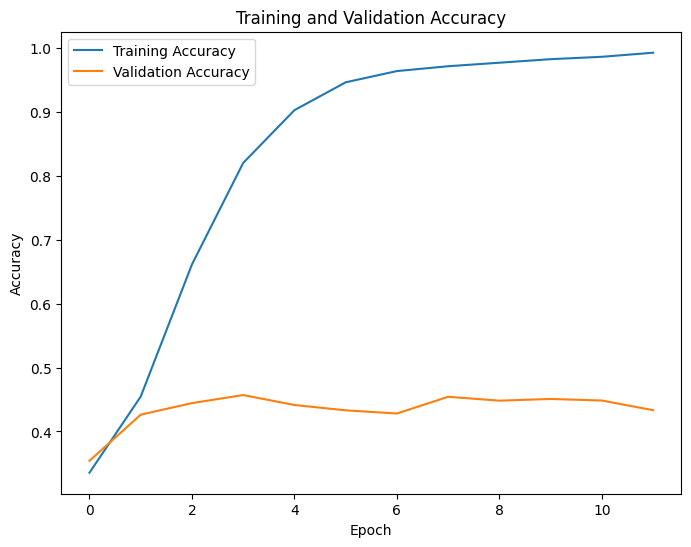

In [22]:
# Plot the training and validation accuracy
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

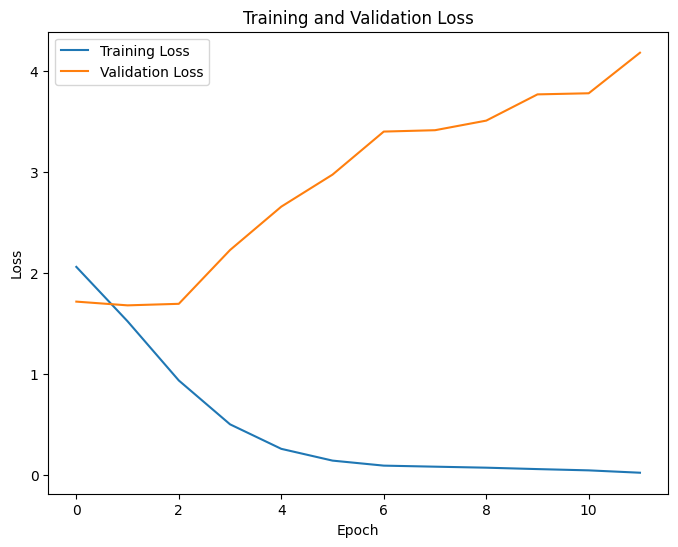

In [23]:
# Plot the training and validation loss
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Από τις γραφικές φαίνεται ακόμη πιο καθαρά η μεγάλη διαφορά μεταξύ των μετρικών εκπαίδευσης και των μετρικών επαλήθευσης. Συγκεκριμένα, συμπεραίνουμε πως το μοντέλο δεν έχει καλή απόδοση, συγκρίνοντας τις τιμές των συναρτήσεων απώλειας της εκπαίδευσης και της επαλήθευσης. Η τέσσερις φορές μεγαλύτερη απώλεια επαλήθευσης φανερώνει πως το μοντέλο έχει πρόβλημα υπερ-προσαρμογής.

Για την περαιτέρω κατανόηση και αξιολόγηση των αποτελεσμάτων, αξιοποιούμε τη συνάρτηση `predict()` για προβλέψεις στο σύνολο ελέγχου. Πιο αναλυτικά, προβλέπεται η πιθανότητα ένα δείγμα να ανήκει σε μία κλάση για κάθε δείγμα του test set. Τα αποτελέσματα των προβλέψεων χρησιμοποιούνται μαζί με τις ετικέτες του συνόλου δεδομένων ελέγχου για τον υπολογισμό της αναφοράς ταξινόμησης *classification report*. Η αναφορά αυτή παρέχει όλες τις απαραίτητες πληροφορίες για την αξιολόγηση της απόδοσης του μοντέλου, αφού επιστρέφει τις μετρικές για κάθε είδος ταινίας (κλάση).

In [24]:
# Predict the labels for the testing features
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis = 1)

# Print the classification report
print(classification_report(y_test, y_pred_labels, target_names=y_raw.unique(), zero_division=1))

139/139 [==============================] - 16s 113ms/step
              precision    recall  f1-score   support

      action       0.47      0.46      0.46       606
      comedy       0.60      0.13      0.21      1128
       drama       1.00      0.00      0.00       396
      horror       0.42      0.84      0.56      1379
       crime       0.51      0.70      0.59       291
     romance       0.31      0.23      0.26       382
    thriller       0.11      0.07      0.09       249

    accuracy                           0.43      4431
   macro avg       0.49      0.35      0.31      4431
weighted avg       0.50      0.43      0.36      4431



Τέλος, υπολογίζονται τα μέτρα απόδοσης του μοντέλου, δεν ξεχνάμε όμως ότι δυστυχώς οι τιμές των μέτρων είναι αναξιόπιστες, καθώς το σύνολο δεδομένων δεν είναι ισορροπημένο. Τα μέτρα αξιολόγησης είναι τα εξής:
1. Ορθότητα (Accuracy): εκφράζει το ποσοστό των ορθών ταξινομήσεων
2. Ακρίβεια (Precision): εκφράζει την πιθανότητα ορθής ταξινόμησης
3. Ανάκληση (Recall): εκφράζει την πιθανότητα μια ορθή ταξινόμηση να είναι όντως ορθή
4. Μέτρo F (F1-score): είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης και παρέχει μια συνολική εκτίμηση του ταξινομητή

Επίσης, γίνεται `weighted averaging`. Η παράμετρος αυτή χρησιμοποιείται για τον υπολογισμό των παραπάνω μετρικών όταν το πρόβλημα αποτελείται από περισσότερες από δύο κλάσεις. Επηρεάζει την κάθε μετρική ως εξής:
* Κάθε μετρική ανά κλάση υπολογίζεται ξεχωριστά.
* Αυτές οι μετρικές ανά κλάση σταθμίζονται με τον αριθμό των αληθών περιπτώσεων για κάθε κλάση και στη συνέχεια υπολογίζεται ο μέσος όρος.

Σε κάθε περίπτωση αυτή η μέθοδος λαμβάνει υπόψη την ανισορροπία στο σύνολο δεδομένων. Οι κλάσεις με περισσότερες περιπτώσεις έχουν μεγαλύτερη επιρροή. Γενικά, είναι μια χρήσιμη τεχνική όταν υπάρχει ένα σύνολο δεδομένων όπου ορισμένες κλάσεις είναι σημαντικά μεγαλύτερες ή μικρότερες από άλλες. Βοηθά στην παροχή μιας πιο ισορροπημένης αξιολόγησης της απόδοσης του μοντέλου σε όλες τις κλάσεις, αντί να επηρεάζεται υπερβολικά από την πλειοψηφούσα κλάση.

<u>Σημείωση</u>: Θέτουμε το `zero_division` ίσο με 1, έναντι της προεπιλεγμένης τιμής 0 για την απουσία εγγραφών με συγκεκριμένη ετικέτα στο σύνολο δεδομένων εκπαίδευσης, με στόχο την αποφυγή **`Warnings`**.

In [25]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy, "\nPrecision:", precision, "\nRecall:", recall, "\nF1-score:", f1)

Accuracy: 0.4263146016700519 
Precision: 0.5031156010987385 
Recall: 0.4263146016700519 
F1-score: 0.35790130958069466


##### Συμπερασματική Συνάρτηση

Τελευταίο βήμα της υλοποίησης είναι η δημιουργία μιας συνάρτησης με την οποία μπορούν να εφαρμοστούν τα παραπάνω βήματα του μοντέλου για οποιαδήποτε νέα εγγραφή ή προσθήκη δεδομένων στο dataset, με στόχο την πρόβλεψη του είδους μιας ταινίας με βάση την περιγραφή της πλοκής της. 

In [26]:
# Function to clean text, make predictions and return predicted movie genre
def infer_tags(text):
    # Preprocess the text
    tokens = preprocess_plot(' '.join(text), stop_words)

    # Tokenize the preprocessed text
    sequences = tokenizer.texts_to_sequences([tokens])
    X = pad_sequences(sequences, sequence_length)

    # Predict the label
    y_pred = model.predict(X)

    # Convert the prediction to a class label
    y_pred_label = np.argmax(y_pred, axis = 1)
    
    return mlb.inverse_transform(y_pred_label)[0]

Στην προκειμένη περίπτωση χρησιμοποιούμε την τελική μορφή του dataset της εργασίας ως έχει και επιλέγουμε τυχαία 5 εγγραφές για να ελέγξουμε την αποτελεσματικότητα του μοντέλου πρόβλεψης του είδους μιας ταινίας.

In [27]:
# Inference function to show predictions
for i in range(5):
    k = np.random.randint(len(X_test))
    plot = X_raw.iloc[k]
    actual_genre = y_raw.iloc[k]
    predicted_genre = infer_tags(plot)

    # Check if the index exists in the dataset
    if k not in data1['Title']:
        print("Movie title not found.")
    else:
        print("Movie:", data1['Title'][k])
        print("Predicted genre:", predicted_genre)
        print("Actual genre:", actual_genre)
        print()

1/1 [==============================] - 0s 38ms/step
Movie: Love in High Gear
Predicted genre: drama
Actual genre: drama

1/1 [==============================] - 0s 36ms/step
Movie title not found.
1/1 [==============================] - 0s 40ms/step
Movie: Honeymoon Limited
Predicted genre: drama
Actual genre: drama

1/1 [==============================] - 0s 39ms/step
Movie: A Rogue's Romance
Predicted genre: drama
Actual genre: romance

1/1 [==============================] - 0s 37ms/step
Movie: Come On Marines!
Predicted genre: action
Actual genre: action



### Πείραμα 2: Αλγοριθμικές Αποφάσεις

#### 2.1 Φόρτωση Δεδομένων

Τα μόνα νέα πακέτα που χρειάζονται για το δεύτερο πείραμα είναι αυτά που θα επιτρέψουν την χρήση του K-Means αλγορίθμου ομαδοποίησης, έχοντας μετατρέψει τα δεδομένα στην κατάλληλη μορφή για τον αλγόριθμο μέσω του TF-IDF. Η Συχνότητα όρου - Αντίστροφη συχνότητα εγγράφου (*Term Frequency - Inverse Document Frequency ή TF-IDF*) είναι εξαιρετικά χρήσιμη μετρική, καθώς εκτιμά τον ρυθμό εμφάνισης μιας λέξης σε ένα 
κείμενο σε σχέση με το σύνολο των κειμένων.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

Αρχικά, αντιγράφεται το αρχικό, επεξεργασμένο dataset για τη δημιουργία του dataset του πειράματος 2.

In [29]:
# Create copy of dataset
data2 = movies_df.copy()

#### 2.2 Προεπεξεργασία Δεδομένων

##### Στήλη 'Plot'

Στο στάδιο της προεπεξεργασίας, εφαρμόζεται η συνάρτηση που ορίστηκε στο πρώτο πείραμα για τον "καθαρισμό" των κειμένων των πλοκών.

In [30]:
# Apply text preprocessing to the 'Plot' column
data2['Clean Plot'] = data2['Plot'].apply(lambda x: preprocess_plot(x, stop_words))

# Check 3 random entries for plot changes
data2[['Plot', 'Clean Plot']].head(3)

,Plot,Clean Plot
6,The film opens with two bandits breaking into ...,"[film, open, two, bandit, breaking, railroad, ..."
7,The film is about a family who move to the sub...,"[film, family, move, suburb, hoping, quiet, li..."
10,The Rarebit Fiend gorges on Welsh rarebit at a...,"[rarebit, fiend, gorge, welsh, rarebit, restau..."


Στο πρώτο πείραμα, το σύνολο δεδομένων είχε υποστεί διάφορες αλλαγές προτού υπολογιστεί το μέγεθος του λεξιλογίου του dataset και το μήκος των ακολουθιών των πλοκών. Επομένως, γράφεται ξανά το αντίστοιχο κομμάτι κώδικα για τον υπολογισμό των μεγεθών αυτών για το δεύτερο σύνολο δεδομένων.

In [31]:
# Analyze word frequencies
all_words = [word for tokens in data2['Clean Plot'] for word in tokens]
word_freq = nltk.FreqDist(all_words)

# Determine vocabulary size based on word frequency
vocab_size = len(word_freq)
print("Unique words in plots:", vocab_size)

# Determine sequence length
sequence_length = int(np.percentile([len(tokens) for tokens in data2['Clean Plot']], 95))
print("Sequence length of each plot:", sequence_length)

Unique words in plots: 139277
Sequence length of each plot: 524


##### Στήλη 'Genre'

Σε αυτή την προσέγγιση, η μείωση των 2241 μοναδικών κατηγοριών ταινίας πραγματοποιείται με τη χρήση του αλγορίθμου K-Means. Ο αλγόριθμος αυτός ομαδοποιεί τα είδη ταινιών με βάση τις πλοκές τους, ώστε να περιοριστεί ο μεγάλος αριθμός κατηγοριών και να βελτιωθεί η απόδοση του μοντέλου.

Αφού μετατραπούν τα κείμενα των πλοκών σε αριθμητική αναπαράσταση, εφαρμόζεται ο αλγόριθμος K-Means. Έπειτα από πολλές δοκιμές, θέτουμε τον αριθμό συστάδων ίσο με 30. Στη συνέχεια, ο αλγόριθμος βρίσκει το πιο δημοφιλές είδος ταινίας μέσα στην κάθε συστάδα και το θέτει ως την ετικέτα της συστάδας. Τέλος, ενημερώνεται η στήλη των συστάδων με τις ετικέτες ειδών που προέκυψαν από την ομαδοποίηση.

In [32]:
# Extract the 'Clean Plot' column for clustering
plots = data2['Clean Plot'].apply(' '.join)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = vocab_size, stop_words = 'english')
plots_vec = tfidf_vectorizer.fit_transform(plots)

# Apply K-Means clustering
kmeans = KMeans(n_clusters = 30, n_init = 'auto', random_state = 5)
cluster_labels = kmeans.fit_predict(plots_vec)

# Assign cluster labels to your dataset
data2['Cluster'] = cluster_labels

# Initialize an empty dictionary to store the cluster-genre mapping
cluster_genre_mapping = {}

# Find unique cluster labels
unique_clusters = data2['Cluster'].unique()

# Loop through each unique cluster label
for cluster_label in unique_clusters:
    # Filter the data for movies in the current cluster
    cluster_data = data2[data2['Cluster'] == cluster_label]
    
    # Find the most common genre in the current cluster
    most_common_genre = cluster_data['Genre'].mode().iloc[0]
    
    # Store the cluster-genre mapping in the dictionary
    cluster_genre_mapping[cluster_label] = most_common_genre

# Replace cluster labels with genre names
data2['Cluster'] = data2['Cluster'].map(cluster_genre_mapping)

Τα είδη (κλάσεις) που προκύπτουν από την ομαδοποίηση είναι τα εξής:

In [33]:
# Find unique values in 'Genre'
classes = data2['Cluster'].unique()

# Print classes
print(classes)

['western' 'drama' 'comedy' 'horror' 'animation']


Ακολουθεί και η απεικόνιση των ειδών.

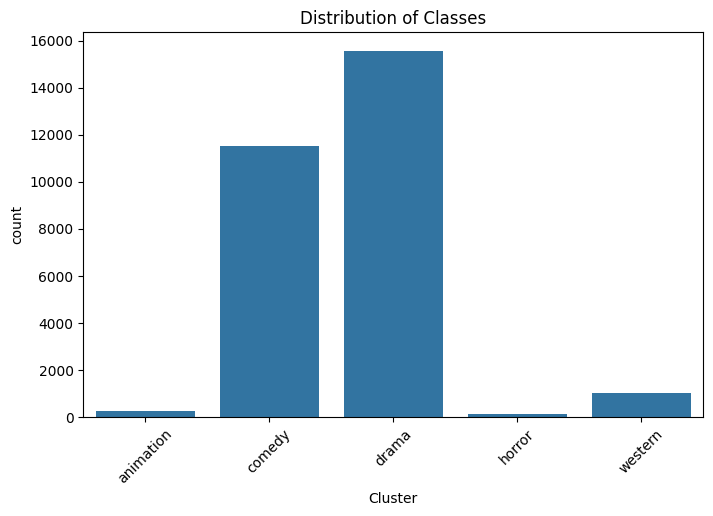

In [34]:
# Convert 'Cluster' column to a categorical variable
data2['Cluster'] = pd.Categorical(data2['Cluster'])

plt.figure(figsize=(8, 5))
sns.countplot(data=data2, x='Cluster')
plt.xlabel('Cluster')
plt.title('Distribution of Classes')
plt.xticks(rotation = 45)
plt.show()

Παρατηρούνται ξανά μη ισορροπημένες κλάσεις, επομένως επαναλαμβάνεται ο κώδικας υπολογισμού των βαρών.

In [35]:
# Compute class weights for the 'Cluster' labels
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=data2['Cluster'])

# Convert the class weights to a dictionary
class_weight_dict = dict(enumerate(class_weights))

Εδώ ολοκληρώνεται το στάδιο της προεπεξεργασίας των δεδομένων, οπότε βεβαιωνόμαστε πως το σύνολο δεδομένων έχει την κατάλληλη μορφή και εμφανίζουμε το τελικό σύνολο ταινιών του dataset.

In [36]:
# Reorder the columns
data2 = data2[['Title', 'Genre', 'Cluster', 'Plot', 'Clean Plot']]

# Print updated rows of dataset and display first few rows of the merged dataset
print("Updated unique movies:",data2.shape[0],"\n")
data2.head()

Updated unique movies: 28560 



,Title,Genre,Cluster,Plot,Clean Plot
6,The Great Train Robbery,western,western,The film opens with two bandits breaking into ...,"[film, open, two, bandit, breaking, railroad, ..."
7,The Suburbanite,comedy,drama,The film is about a family who move to the sub...,"[film, family, move, suburb, hoping, quiet, li..."
10,Dream of a Rarebit Fiend,short,comedy,The Rarebit Fiend gorges on Welsh rarebit at a...,"[rarebit, fiend, gorge, welsh, rarebit, restau..."
11,From Leadville to Aspen: A Hold-Up in the Rockies,short action/crime western,drama,The film features a train traveling through th...,"[film, feature, train, traveling, rockies, hol..."
12,Kathleen Mavourneen,short film,comedy,Irish villager Kathleen is a tenant of Captain...,"[irish, villager, kathleen, tenant, captain, c..."


#### 2.3 Εξαγωγή Χαρακτηριστικών

Αυτό το στάδιο της υλοποίησης δε διαφέρει καθόλου από το αντίστοιχο του πρώτου πειράματος, οπότε ακολουθούμε τα ίδια βήματα, αλλά για το δεύτερο dataset αυτή τη φορά.

In [37]:
# Load data in X,y variables
X_raw = data2['Clean Plot']
y_raw = data2['Cluster']

# Tokenize the plot data
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_raw)
sequences = tokenizer.texts_to_sequences(X_raw)
X = pad_sequences(sequences, sequence_length)

# Convert raw genre labels into binary array format
mlb = LabelEncoder()
y = mlb.fit_transform(y_raw)

#### 2.4 Κατασκευή, Εκπαίδευση και Αξιολόγηση του Μοντέλου Πρόβλεψης

Τα δεδομένα είναι πλέον έτοιμα να χωριστούν σε δύο υποσύνολα, το σύνολο εκπαίδευσης (`training set`) με 80% των αρχικών δεδομένων και το σύνολο ελέγχου (`testing set`) με 20% των αρχικών δεδομένων.

In [38]:
# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("Testing set shapes:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Training set shapes:
X_train shape: (22848, 524)
y_train shape: (22848,)
Testing set shapes:
X_test shape: (5712, 524)
y_test shape: (5712,)


##### Κατασκευή

Δεδομένων των διαφορών μεταξύ των δύο προσεγγίσεων (άνθρωπος vs. αλγόριθμος), θα ήταν πιο αποτελεσματική η δημιουργία ενός πιο κατάλληλου μοντέλου για το πείραμα 2. Αυτό, όμως, δε θα επέτρεπε τη σύγκριση των δύο πειραμάτων. Το μοντέλο, λοιπόν, παραμένει το ίδιο, εκτός από το επίπεδο εξόδου που έχει διαφορετικό αριθμό νευρώνων, ίσο με το σύνολο των κλάσεων της ομαδοποίησης.

In [39]:
# Define the model
model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 128, input_length = sequence_length),
    LSTM(64, return_sequences = True),
    MaxPooling1D(pool_size = 2),
    LSTM(128),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(len(classes), activation = 'softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 524, 128)          17827456  
                                                                 
 lstm_2 (LSTM)               (None, 524, 64)           49408     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 262, 64)           0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 128)               98816     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

##### Εκπαίδευση

Πραγματοποιείται η εκπαίδευση του μοντέλου με τον ίδιο συνδυασμό callbacks που χρησιμοποιήθηκε στο πρώτο πείραμα, και με τη βοήθεια των βαρών που υπολογίστηκαν με βάση τις κλάσεις μας.

In [40]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)

# Train the model with optimizations
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping, reduce_lr], class_weight=class_weight_dict)

Epoch 1/20
714/714 [==============================] - 263s 365ms/step - loss: 1.4340 - accuracy: 0.3529 - val_loss: 1.3325 - val_accuracy: 0.5537 - lr: 0.0010
Epoch 2/20
714/714 [==============================] - 260s 364ms/step - loss: 0.9885 - accuracy: 0.4662 - val_loss: 1.0402 - val_accuracy: 0.5362 - lr: 0.0010
Epoch 3/20
714/714 [==============================] - 260s 364ms/step - loss: 0.5812 - accuracy: 0.5919 - val_loss: 0.8192 - val_accuracy: 0.6348 - lr: 0.0010
Epoch 4/20
714/714 [==============================] - 260s 365ms/step - loss: 0.3104 - accuracy: 0.8334 - val_loss: 0.8475 - val_accuracy: 0.6224 - lr: 0.0010
Epoch 5/20
714/714 [==============================] - 265s 372ms/step - loss: 0.1411 - accuracy: 0.9311 - val_loss: 0.7177 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 6/20
714/714 [==============================] - 265s 371ms/step - loss: 0.0773 - accuracy: 0.9614 - val_loss: 0.8342 - val_accuracy: 0.7223 - lr: 0.0010
Epoch 7/20
714/714 [==========================

##### Αξιολόγηση

Ακολουθούν οι γραφικές παραστάσεις της ακρίβειας και της απώλειας.

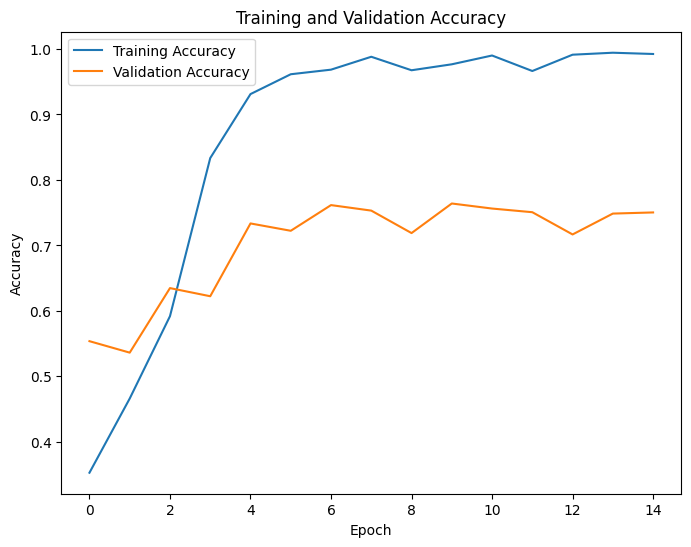

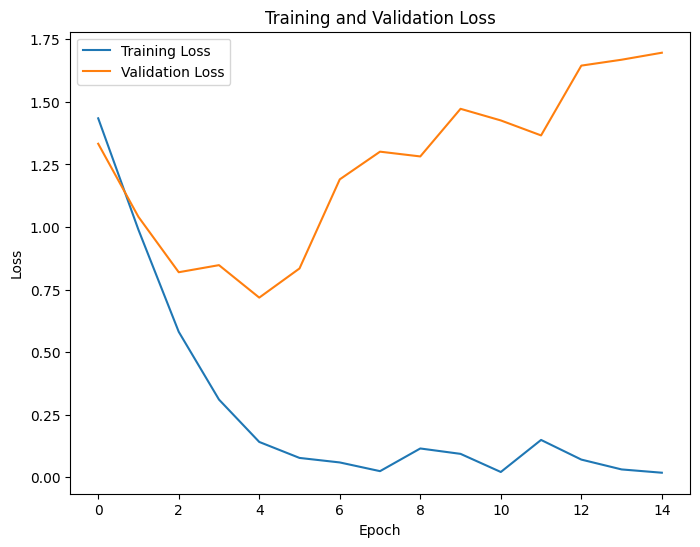

In [41]:
# Plot the training and validation accuracy
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Η απόδοση του μοντέλου φαίνεται να είναι καλύτερη στην περίπτωση του K-Means. Για ακόμη μία φορά, όμως, δεν μπορούμε να εμπιστευτούμε πλήρως τις μετρικές αξιολόγησης του μοντέλου, αφού το σύνολο δεδομένων είναι μη ισορροπημένο.

In [44]:
# Predict the labels for the testing features
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis = 1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted', zero_division=1)

# Print the evaluation metrics
print("Accuracy:", accuracy, "\nPrecision:", precision, "\nRecall:", recall, "\nF1-score:", f1)

179/179 [==============================] - 14s 77ms/step
Accuracy: 0.7335434173669467 
Precision: 0.7340680945478342 
Recall: 0.7335434173669467 
F1-score: 0.7322912672205842


##### Συμπερασματική συνάρτηση

Όπως και στο πείραμα 1, έτσι και στο πείραμα 2 χρησιμοποιείται η συμπερασματική συνάρτηση που ορίσαμε παραπάνω για τον έλεγχο της αποτελεσματικότητας του μοντέλου πρόβλεψης του είδους μιας ταινίας.

In [45]:
# Inference function to show predictions
for i in range(5):
    k = np.random.randint(len(X_test))
    plot = X_raw.iloc[k]
    actual_genre = y_raw.iloc[k]
    predicted_genre = infer_tags(plot)

    # Check if the index exists in the dataset
    if k not in data1['Title']:
        print("Movie title not found.")
    else:
        print("Movie:", data2['Title'][k])
        print("Predicted genre:", predicted_genre)
        print("Actual genre:", actual_genre)
        print()

1/1 [==============================] - 0s 36ms/step
Movie: The Penalty
Predicted genre: drama
Actual genre: drama

1/1 [==============================] - 0s 37ms/step
Movie: Twenty Million Sweethearts
Predicted genre: drama
Actual genre: drama

1/1 [==============================] - 0s 38ms/step
Movie: The Adventures of Martin Eden
Predicted genre: drama
Actual genre: drama

1/1 [==============================] - 0s 37ms/step
Movie: Double Harness
Predicted genre: drama
Actual genre: drama

1/1 [==============================] - 0s 37ms/step
Movie: The Mad Miss Manton
Predicted genre: comedy
Actual genre: comedy



##### Confusion Matrix

Τέλος, δημιουργείται ο confusion matrix για την καλύτερη ερμηνεία των αποτελεσμάτων. Λόγω overfitting, φαίνεται πως το μοντέλο είτε έλαβε λάθος ετικέτες για μερικές ταινίες είτε δεν εκπαιδεύτηκε σωστά.


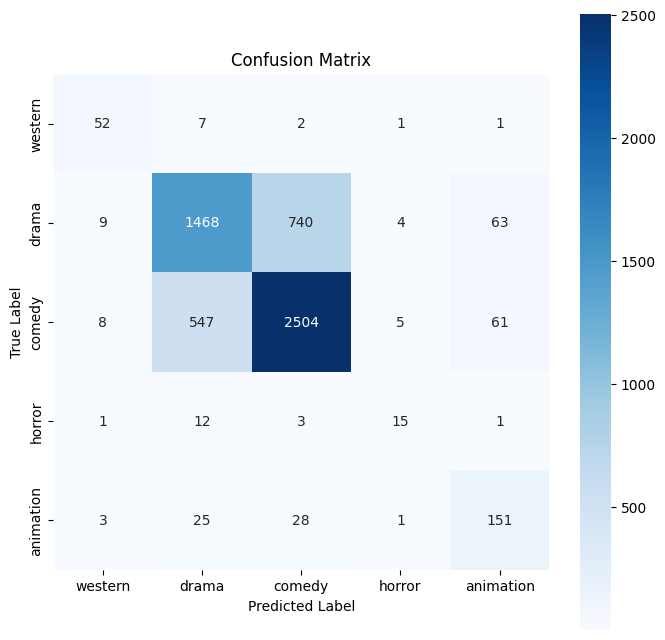

In [49]:
# Inverse transform label encoding for y_test
y_test_labels = mlb.inverse_transform(y_test)

# Create a confusion matrix
cm = confusion_matrix(y_test_labels, mlb.inverse_transform(y_pred_labels))

# Plot the confusion matrix with binary color
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", square = True, xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Συμπεράσματα

Τα αποτελέσματα αφήνουν πολλά περιθώρια βελτίωσης του μοντέλου, είτε με αύξηση του αριθμού των νευρώνων σε κάθε επίπεδο και τροποποίηση των επιπέδων της αρχιτεκτονικής, είτε με χρήση άλλων αρχιτεκτονικών που μελετήθηκαν στην ενότητα της Βιβλιογραφικής ανασκόπησης. Συγκεκριμένα, ένας τρόπος βελτίωσης του μοντέλου είναι η χρήση των προεκπαιδευμένων διανυσμάτων λέξεων GloVe, τα οποία είναι ιδανικά για εξαγωγή χαρακτηριστικών σε σύνολα δεδομένων μεγάλου όγκου. Η χρήση της τεχνικής GloVe, σε συνδυασμό με τα αμφίδρομα δίκτυα Bi-LSTM, υπόσχεται πιο ακριβή αποτελέσματα σύμφωνα με τη βιβλιογραφία, απαιτεί όμως περισσότερους υπολογιστικούς πόρους.

Ένας ακόμη λόγος που δεν έγινε καλύτερη εκπαίδευση του μοντέλου του ανθρώπινου πειράματος, μπορεί να είναι ο τρόπος ομαδοποίησης των κατηγοριών (ειδών) ή/και το γεγονός ότι οι περισσότερες εγγραφές ανήκουν σε πάνω από ένα είδος ταινίας, γεγονός που εν τέλει μας αναγκάζει να προσεγγίσουμε το πρόβλημα ως multi-label για την καλύτερη ταξινόμηση των έντονα διαφοροποιήσιμων πλοκών ταινιών με ένα μόνο κοινό είδος. Οι πολλαπλές ετικέτες για μία ταινία και κατ' επέκταση για μία πλοκή, βοηθούν το μοντέλο να ταιριάξει καλύτερα τα είδη ή και τους συνδυασμούς αυτών, αυξάνοντας την ακρίβεια της εκπαίδευσης. Στην περίπτωση multi-label προσέγγισης, θα χρησιμοποιούσαμε τη σιγμοειδή συνάρτηση ενεργοποίησης (`sigmoid`) και τη συνάρτηση απώλειας δυαδικής εντροπίας (`binary_crossentropy`), καθώς η πρώτη επιτρέπει σε κάθε είδος να έχει ανεξάρτητη πιθανότητα εμφάνισης 0 ή 1, ενώ η δεύτερη έχει σχεδιαστεί για multi-label προβλήματα με δυαδικές ετικέτες (0 ή 1).  

Όσον αφορά το αλγοριθμικό πείραμα με τη χρήση του K-Means, μελλοντικά θα εξεταστούν εναλλακτικά πλήθη συστάδων (`n_clusters`) και συνδυασμός αυτών με διάφορες τιμές της παραμέτρου `random_state`, η χρήση της οποίας διασφαλίζει την αναπαραγωγιμότητα του αλγορίθμου.

## Αναφορές
#### Θεωρία
* Τασουλής, Σ. (2022-2023). *E-class material*. ΠΠΣ: "Βαθιά Μάθηση", Τμήμα Πληροφορικής με Εφαρμογές στη Βιοϊτρική, Πανεπιστήμιο Θεσσαλίας, Λαμία.
* Aggarwal, C. C. (2020). *Νευρωνικά δίκτυα και βαθιά μάθηση*. Εκδόσεις Fountas. ISBN: 9789603308027
* Χατζηλυγερούδης, Ι. (2022, Δεκέμβριος). *Μια εισαγωγή στο Deep Learning*. ΜΠΣ: "Ειδικά Θέματα Τεχνητής Νοημοσύνης", Τμήμα Μηχανικών Η/Υ και Πληροφορικής, Πανεπιστήμιο Πατρών, Πάτρα.
* Wikipedia Movie Plots. (2018, October 15). *Kaggle*. https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots
* Md. Rahman, M. & Malik, S. (2019, November). *Predicting Tags for Movies from Plot Synopses Using Deep Learning Techniques*. Department of Computer Science and Engineering, Islamic University of Technology, Bangladesh.
* Talaviya, A. (2022, September 14). A guide to understanding word embeddings and building your first RNN model using Keras: A complete begineers guide. *Medium*. https://medium.com/@avikumart_/a-guide-to-understanding-word-embeddings-and-building-your-first-rnn-model-using-keras-a-complete-62ef4662d84b

#### State of the Art
* Ertugrul, A. M. & Karagoz, P. (2018). Movie Genre Classification from Plot Summaries Using Bidirectional LSTM. *2018 IEEE 12th International Conference on Semantic Computing (ICSC).* Laguna Hills, CA, USA, pp. 248-251, doi: 10.1109/ICSC.2018.00043
* Wang, J. (2020). Using Machine Learning to Identify Movie Genres through Online Movie Synopses. *2020 2nd International Conference on Information Technology and Computer Application (ITCA)*. https://doi.org/10.1109/itca52113.2020.00008
* Master Movie Genre Prediction with NLP: A Comprehensive Guide to IMDb Dataset Analysis and LSTM Modeling. (2023). *Data-Driven Science*. https://datadrivenscience.com/master-movie-genre-prediction-with-nlp-a-comprehensive-guide-to-imdb-dataset-analysis-and-lstm-modeling/
* Saldanha, R. (2020, May 7). Multilabel-category-prediction. *Kaggle*. https://www.kaggle.com/code/rodsaldanha/multilabel-category-prediction/notebook
* Donelli, F. (2020, December 25). Movie-Genre-Prediction. *GitHub*. https://github.com/fdonel99/Movie-Genre-Prediction
* Verma, A. (2017, December 10). Movie Genre Prediction. *GitHub*. https://github.com/avijit2verma/movie-genre-prediction

#### Ανάπτυξη κώδικα
* Joshi, P. (2022, July 19). Predicting Movie Genres using NLP – An Awesome Introduction to Multi-Label Classification. *Analytics Vidhya*. https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/
* tnsk25. (2020, January 17). Categorization-of-Amazon-Product-Reviews-. *GitHub*. https://github.com/tnsk25/Categorization-of-Amazon-Product-Reviews-
* GeeksforGeeks. (2023). *GeeksforGeeks | A computer science portal for geeks*. https://www.geeksforgeeks.org/
* OpenAI. (2023). *ChatGPT-3.5* (September 25 Version) [Large language model]. https://chat.openai.com
* Google AI (2023). *Bard* (September 27 Version) [Large language model]. https://bard.google.com/
* Discord (2023). *Clyde, Personal Assistant Bot* (GPT-3 Version) [Large language model]. https://dis.gd/clyde